#Jump Conditions and Pressure Balance at the Termination Shock
Nicholas Gross (gross@bu.edu)
This activity should follow the "Heliosphere Stuctures" activity seen the boundaries of the heliosphere, including the termination shock. You will need the date of when V2 crossed the termination shock for this activity.  

 At the termination shock, the solar wind slows down suddeny. In the frame where the shock is stationary, specific “jump conditions” apply, often referred to as the “[Rankin-Hugoniot](https://en.wikipedia.org/wiki/Shocks_and_discontinuities_(magnetohydrodynamics))” conditions.  We will start by considering the first and third relations on this page. You will download some Voyager data to read into a Python Notebook and do some calculations.

For this activity, we will start by looking at
- “B Field Magnitude”
- “Bulk Flow Speed”
- “Proton Density”
- “Proton Temperature”
around the termination shock.

Start with the next cell by loading some packages. These will provide some file read functions, data management, numerical functions, and a plotting package.

In [1]:
!pip install -q pyspedas
import pyspedas
import pytplot as pt
from IPython.display import clear_output
import io
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants

## 0) Loading the data
**Rewrite this section!**

We will again be using the [PySPEDAS package](https://pyspedas.readthedocs.io/en/latest/) to access data from the NASA Heliophysics data portal [CDAweb](https://cdaweb.gsfc.nasa.gov/), which has heliophysics data (plasma, fields, energetic particles, etc.) from a variety of data.

In the cell below, modify the dates to cover a couple of months around the time of the Termination Shock Encounter. (If you do not know which date to use, ask the instructor)

06-Jul-24 15:44:01: <frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()

06-Jul-24 15:44:01: <frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()

06-Jul-24 15:44:01: <frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()

06-Jul-24 15:44:01: <frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()

06-Jul-24 15:44:01: <frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

06-Jul-24 15:44:01: <frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()

06-Jul-24 15:44:01: <frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to fin

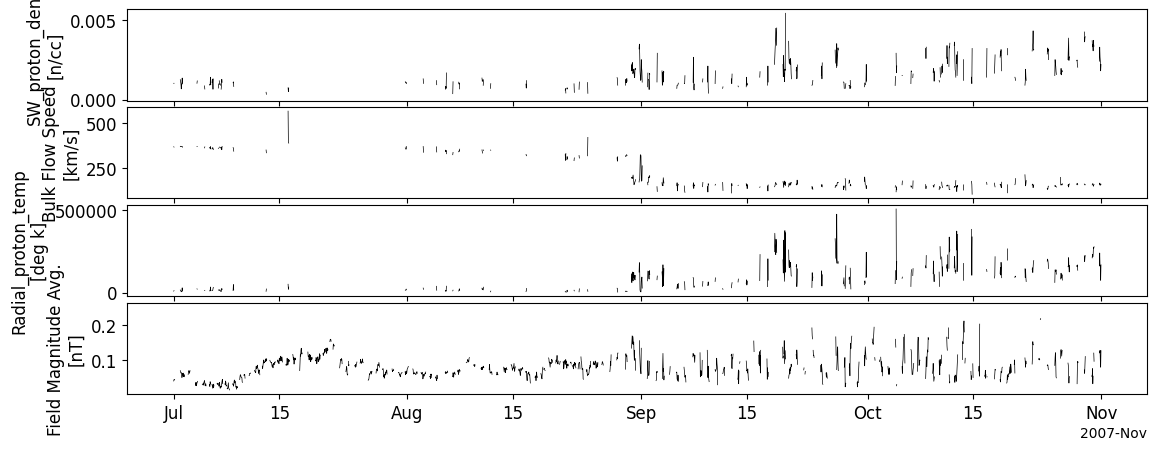

In [2]:
cdaweb_obj = pyspedas.CDAWeb()

dataset = 'VOYAGER2_COHO1HR_MERGED_MAG_PLASMA'
start_time = '2007-07-01 00:00:00'
end_time = '2007-10-30 00:00:00'

urllist = cdaweb_obj.get_filenames([dataset],start_time, end_time)
cdaweb_obj.cda_download(urllist,"cdaweb/",prefix='v2_')
clear_output()
pt.tplot(['v2_protonDensity', 'v2_V','v2_protonTemp','v2_ABS_B']) #add variables as you see fit

##Extract the Data
The cell below extracts the data from the CDAWeb object and then creates a plot (similar to th one above).

Each data object below includes a '.y' value with the actual values of the parmater, and a '.time' value. Notice that the time values are given in seconds measured from Jan. 1st of 1970.

06-Jul-24 15:44:01: /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



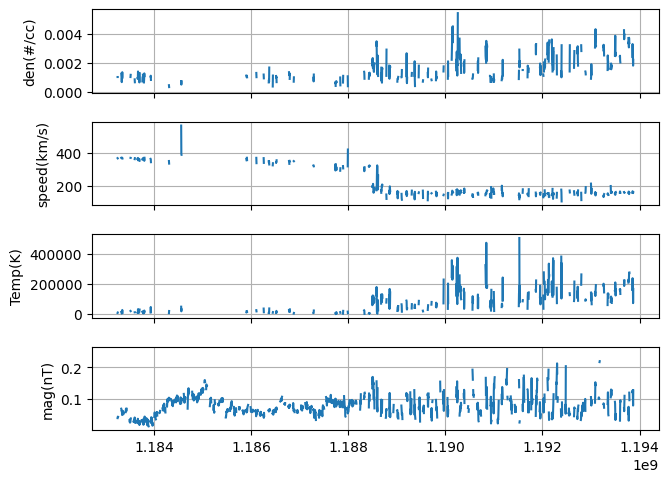

In [3]:
# extract data objects from
den = pt.get_data('v2_protonDensity')
speed = pt.get_data('v2_V')
temp = pt.get_data('v2_protonTemp')
Bmag = pt.get_data('v2_ABS_B')

# Create a time Series plot
fig, axs = plt.subplots(4, 1, sharex = True)
fig.tight_layout()
axs[0].plot(den.times,den.y)
axs[0].set_ylabel('den(#/cc)')
#axs[0].set_ylim(0,0.002)
axs[0].grid(True)

axs[1].plot(speed.times,speed.y)
axs[1].set_ylabel('speed(km/s)')
#axs[1].set_ylim(0,500)
axs[1].grid(True)

axs[2].plot(temp.times,temp.y)
axs[2].set_ylabel('Temp(K)')
#axs[2].set_ylim(0,50000)
axs[2].grid(True)

axs[3].plot(Bmag.times,Bmag.y)
axs[3].set_ylabel('mag(nT)')
#axs[3].set_ylim(0,0.1)
axs[3].grid(True)

plt.show()

### Examine the Time Series
- *What are the typical values for the density, magnetic field, and temperature? Be sure to include the units.* (Try adjusting the y-limits to get more detail)
- *What do you notice about the missing data? Are all the variables always missing?*
- *Do you see evidence for the termination shock in these time series plots?*
- *Estimate the "strength" of the termination shock.*

## Examine the Jump Conditions
At a plasma shock, the jump conditions for the plasma variables are described [here](https://en.wikipedia.org/wiki/Shocks_and_discontinuities_(magnetohydrodynamics).

You will explore the momentum equation (#1) and the pressure equation (#3) in sections below.


### Momentum Shock Condition
The cell below calculates the momentum density of the plasma, $$\rho v_n$$, as measured by Voyager, and then plots it as a function of time.
- Review the code below and modify the calcutions to account for the units of momentum density.
- Hints:
  - scipy has constants such as the proton mass; scipy.constants.proton_mass
  - Also remember that the velocity is in km/s, and the density is in number of particles per cubic centimeters.
  - Your results shold be on the order of $10^{18}$ *kg m/s*

06-Jul-24 15:56:43: /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Text(0, 0.5, 'kg m/s')

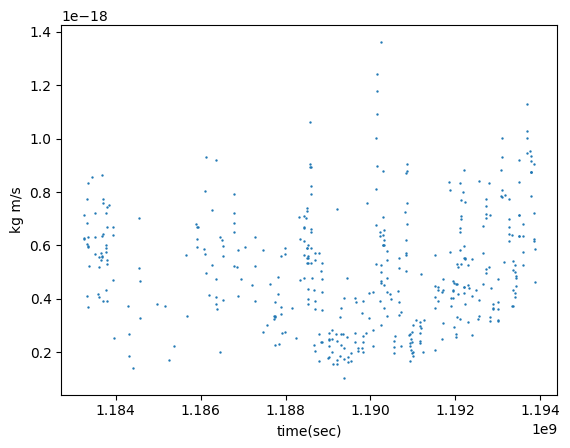

In [11]:
p = [] #create a variable to store momentum
for i in range(len(den.y)):
  y = scipy.constants.proton_mass*den.y[i]*1e6*speed.y[i]*1000 #convert to MKS
  p.append(y)

plt.scatter(den.times, p,0.5)
plt.xlabel('time(sec)')
#plt.yscale('log')
plt.ylabel('kg m/s') #adjust the units as appropriate

#### Momentum Jump Condition Discussion
- *What assumptions were made in this calcultion?  Are those assumptions justified?*
- *Based on this data, is the momentum jump condition satisfied?*


---



###Pressure Jump Conditions
Copy the code above and modify it to calcuate each of the three pressures: ram, thermal, and magnetic.

####Ram Pressure
The ram pressure is the pressue due to the bulk flow of the plasma.
$$P_{ram} = \rho {v_n}^2$$

Copy the cell above to calculate and plot the ram pressure.  Be sure the units are either MKS or CGS

Text(0, 0.5, 'J/m^3')

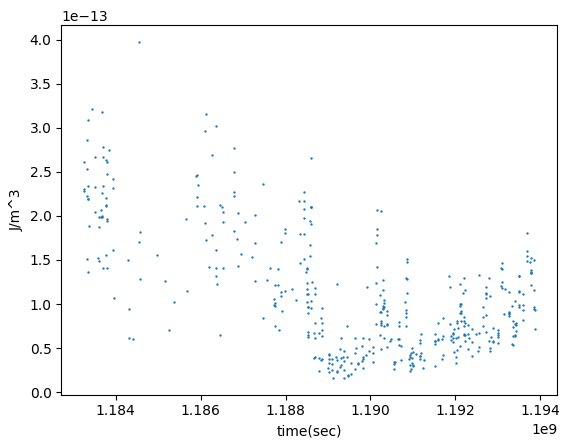

In [15]:
#copy the above cell here and modify to calcuate and plot ram pressue
# be sure to save the ram pressure list with its own name
Pram = [] #create a variable to store momentum
for i in range(len(den.y)):
  y = scipy.constants.proton_mass*den.y[i]*1e6*speed.y[i]*1000*speed.y[i]*1000#convert to MKS
  Pram.append(y)

plt.scatter(den.times, Pram,0.5)
plt.xlabel('time(sec)')
#plt.yscale('log')
plt.ylabel('J/m^3') #adjust the units as appropriate



---



###Thermal Pressure
The thermal pressure can be calculated using the Ideal Gas Law:
$$ PV = N k_bT$$ where $N$ is the number of particles in he volume.  

Rearranging this: $$ P_{thrm} = \frac{N}{V}k_b T = \rho k_b T$$

where $\rho$ is the *number density* (not mass density) and in Scipy, $k_b$ = scipy.constants.k

Use the cell below to calculate and plot the pressure.  


06-Jul-24 16:55:34: /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Text(0, 0.5, 'J/m^3')

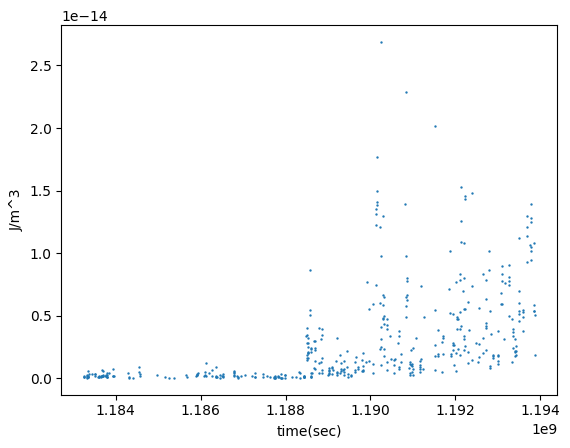

In [32]:
# Calculate and plot the thermal pressure here
Ptherm = [] #create a variable to store momentum
for i in range(len(den.y)):
  y = den.y[i]*1e6*scipy.constants.k*temp.y[i]#convert to MKS
  Ptherm.append(y)

plt.scatter(den.times,Ptherm,0.5)
plt.xlabel('time(sec)')
#plt.yscale('log')
plt.ylabel('J/m^3') #adjust the units as appropriate



---



### Magnetic Pressure
In plasmas the magentic field generates a pressure on the plasma.  The magnetic pressure is given by
$$ P_{mag} = \frac{{B_t}^2}{(2 \mu_0)}$$

Text(0, 0.5, 'J/m^3')

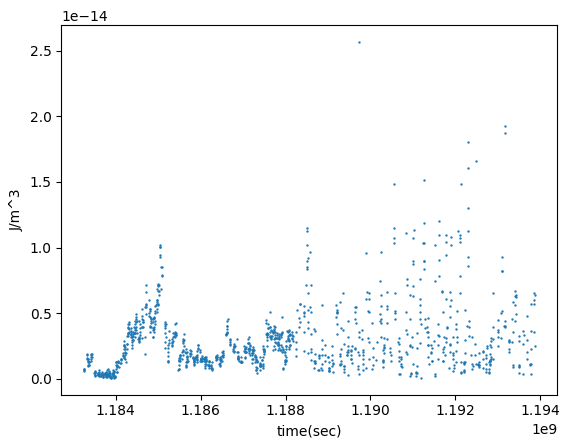

In [36]:
# Calculate and plot the magnetic pressure here
Pmag = [] #create a variable to store momentum
for i in range(len(Bmag.times)):
  y = ((Bmag.y[i]/1e9)**2)/(2*scipy.constants.mu_0)#convert to MKS
  Pmag.append(y)

plt.scatter(den.times,Pmag,0.5)
plt.xlabel('time(sec)')
#plt.yscale('log')
plt.ylabel('J/m^3') #adjust the units as appropriate

### Discussion and Analysis
- *What happens to each pressure term across the shock?*
- *What assumptions were made in using the data provided in these calculations?*
- *Is the total pressure balanced across the shock?*
- Try creating a plot that compares these different pressures. (If you create this, put it on the Jam Board)
- *What explains any descrepancies you see across the shock?*

### Other Considerations
- If the pressures don't balance, what does that mean about the location of the termination shock?
- How might this be important for future mission planning?
- What other variables would you like to see at the termination shock?

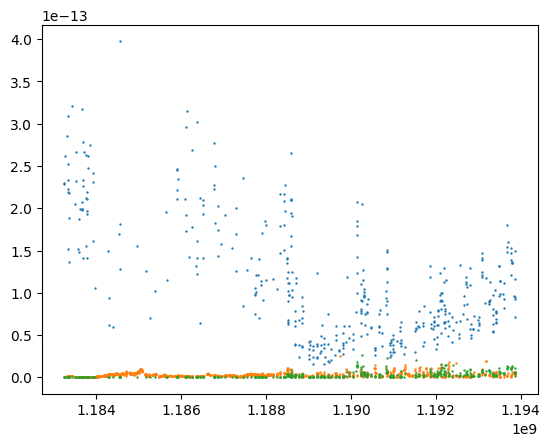

In [39]:
plt.scatter(den.times, Pram,0.5)
plt.scatter(den.times,Pmag,0.5)
plt.scatter(den.times,Ptherm,0.5)